In [1]:
# coding: UTF-8

import os
import sys
spark_home = os.environ.get('SPARK_HOME', None)
sys.path.insert(0, "/opt/spark/python")
sys.path.insert(0, "/opt/spark/python/lib/py4j-0.10.7-src.zip")
exec(open(os.path.join("/opt/spark/python/pyspark/shell.py")).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.6
      /_/

Using Python version 3.6.7 (default, Oct 22 2018 11:32:17)
SparkSession available as 'spark'.


In [2]:
sc

<SparkContext master=spark://192.168.11.9:7077 appName=pyspark-shell>

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
import json

base_meter  = spark.read.csv("/home/okano/pyspark_test/switch-bot-data/*.csv",header=True,inferSchema=True)

In [5]:
base_meter.printSchema()

root
 |-- exec_time: timestamp (nullable = true)
 |-- device_name: string (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: integer (nullable = true)



In [8]:
base_meter.show(5)

+-------------------+-----------+-----------+--------+
|          exec_time|device_name|temperature|humidity|
+-------------------+-----------+-----------+--------+
|2022-01-26 00:00:06| north_room|       16.7|      45|
|2022-01-26 00:00:06| south_room|       10.5|      59|
|2022-01-26 00:06:06| north_room|       16.9|      45|
|2022-01-26 00:06:06| south_room|       10.5|      59|
|2022-01-26 00:12:06| north_room|       17.0|      45|
+-------------------+-----------+-----------+--------+
only showing top 5 rows



In [9]:
from pyspark.sql.functions import date_format
# base_meter.groupBy(date_format("exec_time","yyyy-MM-dd HH").alias("new_date")).count().show()

avg_df = base_meter.select("device_name","exec_time","temperature")\
    .groupBy(date_format("exec_time","yyyy-MM-dd HH").alias("new_date"))\
    .pivot("device_name").avg("temperature").orderBy("new_date")

avg_df.show(10)

+-------------+------------------+------------------+
|     new_date|        north_room|        south_room|
+-------------+------------------+------------------+
|2022-01-11 08|              11.0|              13.2|
|2022-01-11 09|13.030000000000001|              12.8|
|2022-01-11 10|14.969999999999999|              12.3|
|2022-01-11 11|             15.39|11.950000000000001|
|2022-01-11 12|             15.26|             11.73|
|2022-01-11 13|15.290000000000001|              11.6|
|2022-01-11 14|             17.19|             11.32|
|2022-01-11 15|18.580000000000002|             11.11|
|2022-01-11 16|             19.49|10.870000000000001|
|2022-01-11 17|             20.21|10.720000000000002|
+-------------+------------------+------------------+
only showing top 10 rows



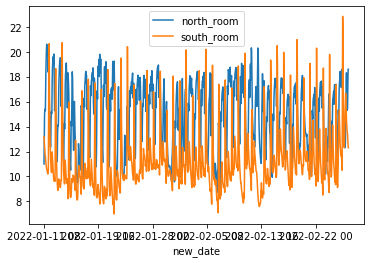

In [10]:
%matplotlib inline
pd_avg_df = avg_df.toPandas()
pd_avg_df.set_index("new_date").plot()

In [13]:
avg_df.rdd.getNumPartitions()

200